In [1]:
%matplotlib inline
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import chart_data_cleaning as cf
from nltk.corpus import stopwords

In [2]:
#load anime csv and convert to dataframe
file_anime = 'Elena_Practice_Files/data/animes.csv'
anime_df = pd.read_csv(file_anime)
anime_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [3]:
# Drop rows that are missing a synoposis
anime_df = anime_df.dropna(axis=0, how='any', subset=['synopsis'])

In [4]:
#Drop genres we are not interested in
anime_df = anime_df[anime_df['genre'].str.contains("Hentai") == False]

In [5]:
#confirm bad genres were dropped
anime_df['genre'].value_counts()

['Music']                                                                 708
['Comedy']                                                                598
['Kids']                                                                  364
['Dementia']                                                              191
['Music', 'Kids']                                                         184
                                                                         ... 
['Super Power', 'Martial Arts']                                             1
['Action', 'Horror', 'School', 'Shounen', 'Supernatural']                   1
['Adventure', 'Comedy', 'Horror', 'Supernatural', 'School', 'Shounen']      1
['Fantasy', 'Comedy', 'Shoujo']                                             1
['Music', 'Romance', 'Super Power', 'Supernatural']                         1
Name: genre, Length: 4611, dtype: int64

In [6]:
#create a cleaned anime dataframe with columns we want
anime_cleaned_df = anime_df[['uid', 'title', 'synopsis', 'members', 'popularity', 'ranked', 'score', 'genre', 'aired', 'episodes']]
anime_cleaned_df.head()

,uid,title,synopsis,members,popularity,ranked,score,genre,aired,episodes
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,141,25.0,8.82,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,28,24.0,8.83,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,98,23.0,8.83,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,4,1.0,9.23,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0


In [7]:
#check shape of cleaned database
anime_cleaned_df.shape

(16010, 10)

In [8]:
#check data types
anime_cleaned_df.dtypes

uid             int64
title          object
synopsis       object
members         int64
popularity      int64
ranked        float64
score         float64
genre          object
aired          object
episodes      float64
dtype: object

In [9]:
#remove animes with a score of less than 7
#want to recommend well ranked animes for new users
anime_cleaned_df = anime_cleaned_df[anime_cleaned_df['score'] > 6.99]
anime_cleaned_df.shape

(5111, 10)

In [10]:
anime_cleaned_df.head()

,uid,title,synopsis,members,popularity,ranked,score,genre,aired,episodes
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,141,25.0,8.82,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,28,24.0,8.83,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,98,23.0,8.83,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,4,1.0,9.23,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0


In [11]:
#load live action csvs
file_amazon = 'Elena_Practice_Files/data/amazon_prime_titles.csv'
file_hulu = 'Elena_Practice_Files/data/hulu_titles.csv'
file_disney = 'Elena_Practice_Files/data/disney_plus_titles.csv'
file_netflix = 'Elena_Practice_Files/data/netflix_titles.csv'

In [12]:
#convert csvs to dataframes
amazon_df = pd.read_csv(file_amazon)
hulu_df = pd.read_csv(file_hulu)
disney_df = pd.read_csv(file_disney)
netflix_df = pd.read_csv(file_netflix)

In [13]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
#clean dataframes to include show id, title, and description
netflix_cleaned_df = netflix_df[['show_id', 'title', 'description', 'release_year', 'type', 'listed_in']]
disney_cleaned_df = disney_df[['show_id', 'title', 'description', 'release_year', 'type', 'listed_in']]
amazon_cleaned_df = amazon_df[['show_id', 'title', 'description', 'release_year', 'type', 'listed_in']]
hulu_cleaned_df = hulu_df[['show_id', 'title', 'description', 'release_year', 'type', 'listed_in']]

In [15]:
#check netflix dataframe
netflix_cleaned_df.head()

,show_id,title,description,release_year,type,listed_in
0,s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",2020,Movie,Documentaries
1,s2,Blood & Water,"After crossing paths at a party, a Cape Town t...",2021,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Ganglands,To protect his family from a powerful drug lor...,2021,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",2021,TV Show,"Docuseries, Reality TV"
4,s5,Kota Factory,In a city of coaching centers known to train I...,2021,TV Show,"International TV Shows, Romantic TV Shows, TV ..."


In [16]:
#add identifier to beginning of show id to differentiate between different sources
netflix_cleaned_df['show_id'] = 'n-' + netflix_cleaned_df['show_id']
disney_cleaned_df['show_id'] = 'd-' + disney_cleaned_df['show_id']
hulu_cleaned_df['show_id'] = 'h-' + hulu_cleaned_df['show_id']
amazon_cleaned_df['show_id'] = 'a-' + amazon_cleaned_df['show_id']

C:\Users\coleh\AppData\Local\Temp/ipykernel_18292/3631967037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned_df['show_id'] = 'n-' + netflix_cleaned_df['show_id']
C:\Users\coleh\AppData\Local\Temp/ipykernel_18292/3631967037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_cleaned_df['show_id'] = 'd-' + disney_cleaned_df['show_id']
C:\Users\coleh\AppData\Local\Temp/ipykernel_18292/3631967037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [17]:
#check amazon dataframe
amazon_cleaned_df.head()

,show_id,title,description,release_year,type,listed_in
0,a-s1,The Grand Seduction,A small fishing village must procure a local d...,2014,Movie,"Comedy, Drama"
1,a-s2,Take Care Good Night,A Metro Family decides to fight a Cyber Crimin...,2018,Movie,"Drama, International"
2,a-s3,Secrets of Deception,After a man discovers his wife is cheating on ...,2017,Movie,"Action, Drama, Suspense"
3,a-s4,Pink: Staying True,"Pink breaks the mold once again, bringing her ...",2014,Movie,Documentary
4,a-s5,Monster Maker,Teenage Matt Banting wants to work with a famo...,1989,Movie,"Drama, Fantasy"


In [18]:
#add source column to show what the live action is streaming on
netflix_cleaned_df['source'] = 'Netflix'
disney_cleaned_df['source'] = 'Disney'
hulu_cleaned_df['source'] = 'Hulu'
amazon_cleaned_df['source'] = 'Amazon'

C:\Users\coleh\AppData\Local\Temp/ipykernel_18292/3906735143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cleaned_df['source'] = 'Netflix'
C:\Users\coleh\AppData\Local\Temp/ipykernel_18292/3906735143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_cleaned_df['source'] = 'Disney'
C:\Users\coleh\AppData\Local\Temp/ipykernel_18292/3906735143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [19]:
#check hulu dataframe
hulu_cleaned_df.head()

,show_id,title,description,release_year,type,listed_in,source
0,h-s1,Ricky Velez: Here's Everything,​Comedian Ricky Velez bares it all with his ho...,2021,Movie,"Comedy, Stand Up",Hulu
1,h-s2,Silent Night,"Mark, a low end South London hitman recently r...",2020,Movie,"Crime, Drama, Thriller",Hulu
2,h-s3,The Marksman,A hardened Arizona rancher tries to protect an...,2021,Movie,"Action, Thriller",Hulu
3,h-s4,Gaia,A forest ranger and two survivalists with a cu...,2021,Movie,Horror,Hulu
4,h-s5,Settlers,Mankind's earliest settlers on the Martian fro...,2021,Movie,"Science Fiction, Thriller",Hulu


In [20]:
#group live action dataframes to prep for concat
dfs = [netflix_cleaned_df, hulu_cleaned_df, disney_cleaned_df,amazon_cleaned_df]

In [21]:
#create full live action dataframe
live_action_df = pd.concat(dfs)

In [22]:
# check live action df
live_action_df.head()

,show_id,title,description,release_year,type,listed_in,source
0,n-s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",2020,Movie,Documentaries,Netflix
1,n-s2,Blood & Water,"After crossing paths at a party, a Cape Town t...",2021,TV Show,"International TV Shows, TV Dramas, TV Mysteries",Netflix
2,n-s3,Ganglands,To protect his family from a powerful drug lor...,2021,TV Show,"Crime TV Shows, International TV Shows, TV Act...",Netflix
3,n-s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",2021,TV Show,"Docuseries, Reality TV",Netflix
4,n-s5,Kota Factory,In a city of coaching centers known to train I...,2021,TV Show,"International TV Shows, Romantic TV Shows, TV ...",Netflix


In [23]:
#check count of live actions from each source
live_action_df.groupby('source').count()

,show_id,title,description,release_year,type,listed_in
source,,,,,,
Amazon,9668,9668,9668,9668,9668,9668
Disney,1450,1450,1450,1450,1450,1450
Hulu,3073,3073,3069,3073,3073,3073
Netflix,8807,8807,8807,8807,8807,8807


In [24]:
#check na volumes
live_action_df.isna().sum()

show_id         0
title           0
description     4
release_year    0
type            0
listed_in       0
source          0
dtype: int64

In [25]:
#drop na rows
live_action_df = live_action_df.dropna()

In [26]:
#check live action df shape
live_action_df.shape

(22994, 7)

In [27]:
#verify na values are dropped
live_action_df.isna().sum()

show_id         0
title           0
description     0
release_year    0
type            0
listed_in       0
source          0
dtype: int64

In [28]:
#live action language detect - find only english
#live_action_df = cf.langDetect(live_action_df)
#live_action_df.count()

In [29]:
#drop columns with'Español' in title
live_action_df = live_action_df.loc[live_action_df['title'].str.contains('Español') == False]
live_action_df.shape

(22964, 7)

In [30]:
# Import stopwords with nltk.

stop = stopwords.words('english')

#remove stopwords from description column and create new column
live_action_df['description_without_stopwords'] = live_action_df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
anime_cleaned_df['description_without_stopwords'] = anime_cleaned_df['synopsis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [31]:
#drop duplicate titles
live_action_df = live_action_df.drop_duplicates('title')

In [32]:
live_action_df.shape

(22081, 8)

In [33]:
live_action_df = live_action_df.drop_duplicates('description')


In [34]:
live_action_df.shape

(21784, 8)

In [35]:
#convert both cleaned dfs to csvs
anime_cleaned_df.to_csv('Final Resources/cleaned_anime.csv', index = False)
live_action_df.to_csv('Final Resources/cleaned_live_actions.csv', index = False)

In [36]:
anime_cleaned_df.head()

,uid,title,synopsis,members,popularity,ranked,score,genre,aired,episodes,description_without_stopwords
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,141,25.0,8.82,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,"Following participation Inter-High, Karasuno H..."
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,28,24.0,8.83,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,"Music accompanies path human metronome, prodig..."
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,98,23.0,8.83,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,The Abyss—a gaping chasm stretching depths ear...
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,4,1.0,9.23,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,"""In order something obtained, something equal ..."
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,After helping revive legendary vampire Kiss-sh...


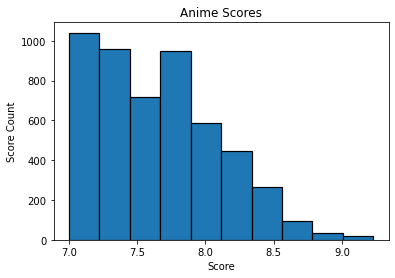

In [37]:
#data = anime_df.score
plt.hist(anime_cleaned_df['score'], bins = 10, edgecolor='black', linewidth=1.2, alpha=1)

plt.xlabel('Score')
plt.ylabel('Score Count')
plt.title('Anime Scores')


plt.show()

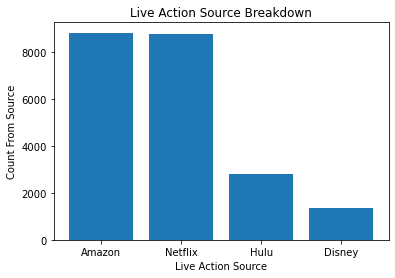

In [38]:
live_action_counts_df = pd.DataFrame(live_action_df['source'].value_counts())

x = live_action_counts_df.index
y = live_action_counts_df.source

plt.bar(x, y)
plt.xlabel('Live Action Source')
plt.ylabel('Count From Source')
plt.title('Live Action Source Breakdown')

plt.show()

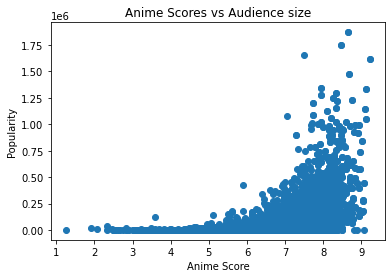

In [39]:
x= anime_df['score']
y= anime_df['members']

plt.scatter(x,y)
plt.xlabel('Anime Score')
plt.ylabel('Popularity')
plt.title('Anime Scores vs Audience size')

plt.show()

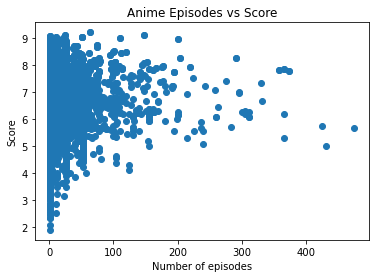

In [40]:
anime_test_df = anime_df[anime_df['episodes'] <500]

x= anime_test_df['episodes'] 
y= anime_test_df['score']

plt.scatter(x,y)
plt.xlabel('Number of episodes')
plt.ylabel('Score')
plt.title('Anime Episodes vs Score')

plt.show()

In [41]:
# data exploration
df = anime_cleaned_df.loc[(anime_cleaned_df['score']> 8.5) & (anime_cleaned_df['members']<250000)]
df

,uid,title,synopsis,members,popularity,ranked,score,genre,aired,episodes,description_without_stopwords
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,After helping revive legendary vampire Kiss-sh...
8,35247,Owarimonogatari 2nd Season,Following an encounter with oddity specialist ...,189944,573,18.0,8.93,"['Mystery', 'Comedy', 'Supernatural', 'Vampire']","Aug 12, 2017 to Aug 13, 2017",7.0,Following encounter oddity specialist Izuko Ga...
11,34096,Gintama.,After joining the resistance against the bakuf...,139309,800,15.0,8.94,"['Action', 'Comedy', 'Historical', 'Parody', '...","Jan 9, 2017 to Mar 27, 2017",12.0,"After joining resistance bakufu, Gintoki gang ..."
12,15335,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,When Gintoki apprehends a movie pirate at a pr...,135232,833,14.0,8.95,"['Action', 'Sci-Fi', 'Comedy', 'Historical', '...","Jul 6, 2013",1.0,"When Gintoki apprehends movie pirate premiere,..."
15,15417,Gintama': Enchousen,"While Gintoki Sakata was away, the Yorozuya fo...",166446,667,11.0,8.98,"['Action', 'Comedy', 'Historical', 'Parody', '...","Oct 4, 2012 to Mar 28, 2013",13.0,"While Gintoki Sakata away, Yorozuya found new ..."
...,...,...,...,...,...,...,...,...,...,...,...
18056,37491,Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,Second Season of the final arc of Gintama .,67444,1557,32.0,8.76,"['Action', 'Comedy', 'Historical', 'Parody', '...","Jul 9, 2018 to Oct 8, 2018",14.0,Second Season final arc Gintama .
18060,33095,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,Even after having risen to the utmost rank of ...,106792,1050,27.0,8.78,"['Drama', 'Historical', 'Josei']","Jan 7, 2017 to Mar 25, 2017",12.0,"Even risen utmost rank shun'ichi, Yotaro strug..."
18064,35180,3-gatsu no Lion 2nd Season,"Now in his second year of high school, Rei Kir...",169544,657,9.0,9.02,"['Drama', 'Game', 'Seinen', 'Slice of Life']","Oct 14, 2017 to Mar 31, 2018",22.0,"Now second year high school, Rei Kiriyama cont..."
18065,820,Ginga Eiyuu Densetsu,The 150-year-long stalemate between the two in...,175423,620,8.0,9.03,"['Military', 'Sci-Fi', 'Space', 'Drama']","Jan 8, 1988 to Mar 17, 1997",110.0,The 150-year-long stalemate two interstellar s...


In [42]:
live_action_df[live_action_df['title'].str.contains('Shrek')]

,show_id,title,description,release_year,type,listed_in,source,description_without_stopwords
2902,n-s2903,DreamWorks Shrek's Swamp Stories,"Shrek celebrates Halloween, Puss in Boots is c...",2008,TV Show,"Kids' TV, TV Action & Adventure, TV Comedies",Netflix,"Shrek celebrates Halloween, Puss Boots capture..."
5936,n-s5937,Shrek the Musical,The greatest fairy tale never told comes to li...,2013,Movie,"Children & Family Movies, Comedies, Music & Mu...",Netflix,The greatest fairy tale never told comes life ...
836,h-s837,Shrek 2,After battling a fire-breathing dragon and the...,2004,Movie,"Adventure, Cartoons, Comedy",Hulu,After battling fire-breathing dragon evil Lord...
1079,h-s1080,Shrek,"Once upon a time, in a far away swamp, there l...",2001,Movie,"Action, Adventure, Cartoons",Hulu,"Once upon time, far away swamp, lived ornery o..."


In [43]:
#check columns with'Español' in title to potentially delete
live_action_df[live_action_df['title'].str.contains('Español')]

,show_id,title,description,release_year,type,listed_in,source,description_without_stopwords


In [44]:
cf.scatterCSV(anime_cleaned_df)

In [45]:
cf.getTimeseries(anime_cleaned_df, live_action_df)

C:\Users\coleh\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\coleh\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\Users\coleh\Documents\Git\BootCamp\Animeniacs\chart_data_cleaning.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [46]:
cf.movieVSshow(anime_cleaned_df, live_action_df)

In [47]:
cf.masterGenre(anime_cleaned_df, live_action_df)

In [ ]:
cf.sentenceEmbedding(anime_cleaned_df,live_action_df)